<a href="https://colab.research.google.com/github/Aydino/carbon/blob/main/Carbon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carbon analysis. 

# DATA DESCRIPTIVE ANALYSIS

First import libraries

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from IPython.display import display, HTML


Import data

In [74]:
df = pd.read_csv("Data.csv")
# To display the top 5 rows 
df.head(5)  

,BLDG_PUBID,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,$BLDG_AREA_M2,$BLDG_AREA_FT2,BLDG_STOR_A,$BLDG_STOR_A,LCA_YEAR,LCA_REFPERIOD,LCA_SOUR_CODE,LCA_STAGES,LCA_BLDG_SCOPE,LCA_MAT_Q,EC_WB_EX_OPER,EC_LCAA_PERM2
0,A00,Commercial,Mixed use,Middle East,New,46452 to 92903,"500,001 to 1 million",0,More than 25,2016.0,40.0,41.0,AB,SF,Y,2567.39,2521.63
1,A00,Commercial,Other,North America,New,46452 to 92903,"500,001 to 1 million",0,7 to 14,2016.0,40.0,41.0,AB,SF,Y,1699.34,1332.55
2,A00,Commercial,Office,Europe,New,46452 to 92903,"500,001 to 1 million",0,More than 25,2016.0,40.0,41.0,AB,SF,Y,1303.39,1031.76
3,A00,Commercial,Other,North America,New,930 to 2323,"10,001 to 25,000",0,1 to 6,2016.0,40.0,41.0,AB,SF,Y,1211.33,938.69
4,A00,Commercial,Office,Asia-Pacific,New,Over 92903,Over 1 million,0,15 to 25,2016.0,40.0,41.0,AB,SF,Y,1087.86,937.59


Checking the types of data

In [75]:
df.dtypes

BLDG_PUBID          object
BLDG_TYP            object
BLDG_US             object
BLDG_LOC_REGION     object
BLDG_NEW_REN        object
$BLDG_AREA_M2       object
$BLDG_AREA_FT2      object
BLDG_STOR_A          int64
$BLDG_STOR_A        object
LCA_YEAR           float64
LCA_REFPERIOD      float64
LCA_SOUR_CODE      float64
LCA_STAGES          object
LCA_BLDG_SCOPE      object
LCA_MAT_Q           object
EC_WB_EX_OPER      float64
EC_LCAA_PERM2      float64
dtype: object

Dropping irrelevant columns

In [76]:
df=df.drop(['BLDG_PUBID','BLDG_STOR_A','LCA_YEAR','LCA_REFPERIOD','LCA_SOUR_CODE','LCA_STAGES','LCA_BLDG_SCOPE','LCA_MAT_Q','$BLDG_AREA_FT2' ],axis=1)
df.head(5)


,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,$BLDG_AREA_M2,$BLDG_STOR_A,EC_WB_EX_OPER,EC_LCAA_PERM2
0,Commercial,Mixed use,Middle East,New,46452 to 92903,More than 25,2567.39,2521.63
1,Commercial,Other,North America,New,46452 to 92903,7 to 14,1699.34,1332.55
2,Commercial,Office,Europe,New,46452 to 92903,More than 25,1303.39,1031.76
3,Commercial,Other,North America,New,930 to 2323,1 to 6,1211.33,938.69
4,Commercial,Office,Asia-Pacific,New,Over 92903,15 to 25,1087.86,937.59


In [77]:
df.shape

(1191, 8)

Dublicate Check

In [78]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (58, 8)


Drop Dublicates

In [79]:
df = df.drop_duplicates()
df.head(5)

,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,$BLDG_AREA_M2,$BLDG_STOR_A,EC_WB_EX_OPER,EC_LCAA_PERM2
0,Commercial,Mixed use,Middle East,New,46452 to 92903,More than 25,2567.39,2521.63
1,Commercial,Other,North America,New,46452 to 92903,7 to 14,1699.34,1332.55
2,Commercial,Office,Europe,New,46452 to 92903,More than 25,1303.39,1031.76
3,Commercial,Other,North America,New,930 to 2323,1 to 6,1211.33,938.69
4,Commercial,Office,Asia-Pacific,New,Over 92903,15 to 25,1087.86,937.59


In [80]:
df.count()

BLDG_TYP           1120
BLDG_US            1119
BLDG_LOC_REGION    1002
BLDG_NEW_REN       1117
$BLDG_AREA_M2      1131
$BLDG_STOR_A       1070
EC_WB_EX_OPER      1124
EC_LCAA_PERM2       988
dtype: int64

Dropping the missing or null values.

In [81]:
print(df.isnull().sum())

BLDG_TYP            13
BLDG_US             14
BLDG_LOC_REGION    131
BLDG_NEW_REN        16
$BLDG_AREA_M2        2
$BLDG_STOR_A        63
EC_WB_EX_OPER        9
EC_LCAA_PERM2      145
dtype: int64


In [82]:
df = df.dropna()    # Dropping the missing values and zeros
df.count()

BLDG_TYP           840
BLDG_US            840
BLDG_LOC_REGION    840
BLDG_NEW_REN       840
$BLDG_AREA_M2      840
$BLDG_STOR_A       840
EC_WB_EX_OPER      840
EC_LCAA_PERM2      840
dtype: int64

In [83]:
print(df.isnull().sum())   # After dropping the values

BLDG_TYP           0
BLDG_US            0
BLDG_LOC_REGION    0
BLDG_NEW_REN       0
$BLDG_AREA_M2      0
$BLDG_STOR_A       0
EC_WB_EX_OPER      0
EC_LCAA_PERM2      0
dtype: int64


Detecting Outliers

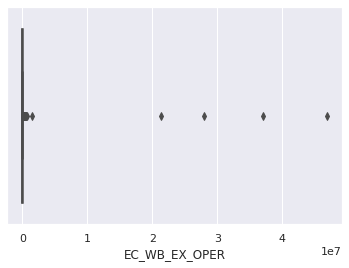

In [84]:
sns.boxplot(x=df['EC_WB_EX_OPER'])

In [85]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

EC_WB_EX_OPER    21576.9575
EC_LCAA_PERM2      286.3400
dtype: float64


Outliers elimination

In [86]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(673, 8)

Change Column Names

In [87]:
df = df.rename(columns={'$BLDG_AREA_M2':'BLDG_AREA_M2','$BLDG_AREA_FT2':'BLDG_AREA_FT2','$BLDG_STOR_A':'BLDG_STOR_A'})
df.head(5)

,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,BLDG_AREA_M2,BLDG_STOR_A,EC_WB_EX_OPER,EC_LCAA_PERM2
3,Commercial,Other,North America,New,930 to 2323,1 to 6,1211.33,938.69
4,Commercial,Office,Asia-Pacific,New,Over 92903,15 to 25,1087.86,937.59
5,Commercial,Office,Asia-Pacific,New,46452 to 92903,1 to 6,992.27,923.30
6,Commercial,Other,North America,New,18581 to 46451,1 to 6,1185.57,917.93
7,Commercial,Other,North America,New,18581 to 46451,1 to 6,1140.08,882.65


Add column

Histogram---------

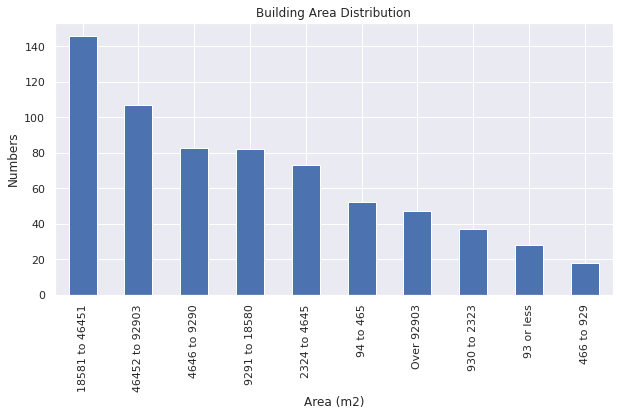

In [88]:
df.BLDG_AREA_M2.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Building Area Distribution")
plt.ylabel('Numbers')
plt.xlabel('Area (m2)');

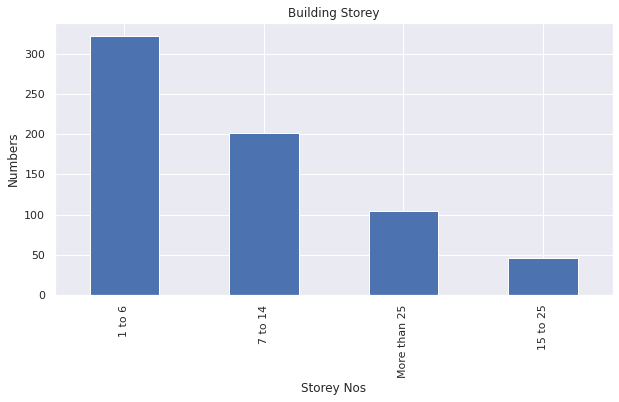

In [89]:
df.BLDG_STOR_A.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Building Storey")
plt.ylabel('Numbers')
plt.xlabel('Storey Nos');

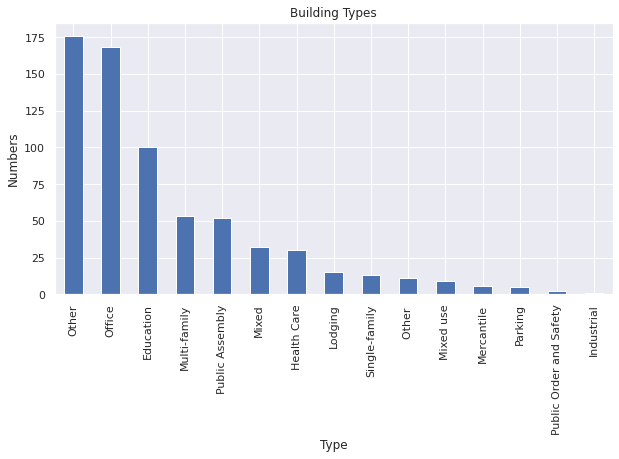

In [90]:
df.BLDG_US.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Building Types")
plt.ylabel('Numbers')
plt.xlabel('Type');

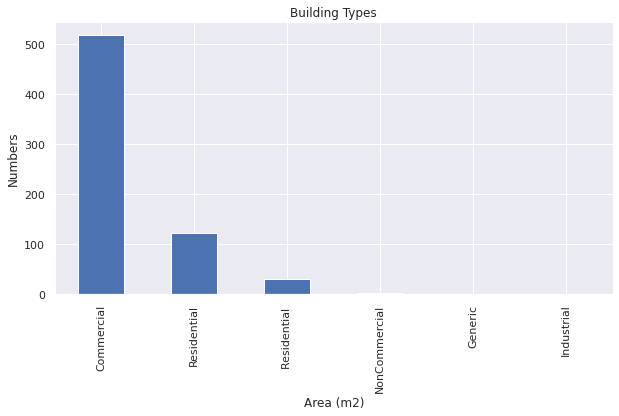

In [91]:
df.BLDG_TYP.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Building Types")
plt.ylabel('Numbers')
plt.xlabel('Area (m2)');

Let's check corr betweeen total carbon and unit carbon.

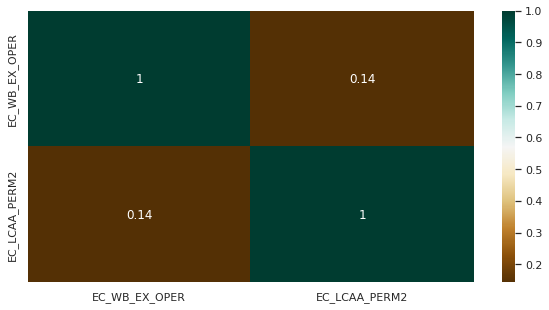

In [92]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

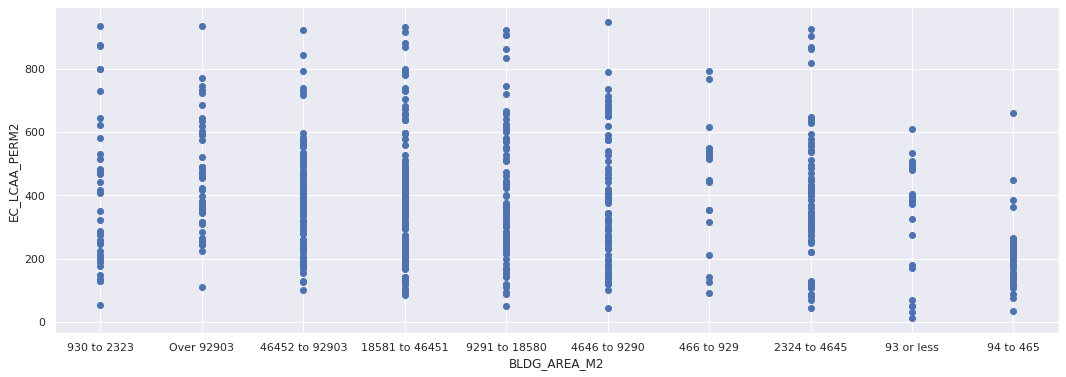

In [93]:
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df['BLDG_AREA_M2'], df['EC_LCAA_PERM2'])
ax.set_xlabel('BLDG_AREA_M2')
ax.set_ylabel('EC_LCAA_PERM2')
plt.show()

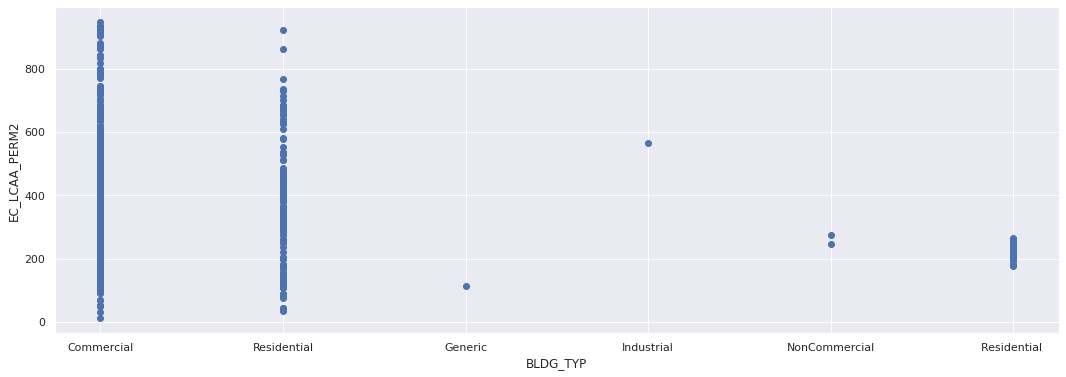

In [94]:
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df['BLDG_TYP'], df['EC_LCAA_PERM2'])
ax.set_xlabel('BLDG_TYP')
ax.set_ylabel('EC_LCAA_PERM2')
plt.show()

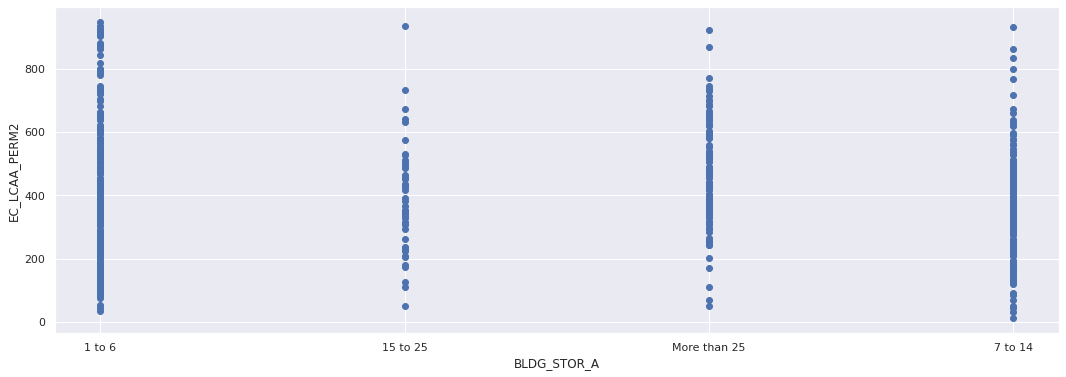

In [95]:
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df['BLDG_STOR_A'], df['EC_LCAA_PERM2'])
ax.set_xlabel('BLDG_STOR_A')
ax.set_ylabel('EC_LCAA_PERM2')
plt.show()

Statistical data of the data frame

In [96]:
df['EC_LCAA_PERM2'].describe()

count    673.000000
mean     374.075245
std      192.614461
min       10.000000
25%      230.000000
50%      352.000000
75%      485.000000
max      950.000000
Name: EC_LCAA_PERM2, dtype: float64

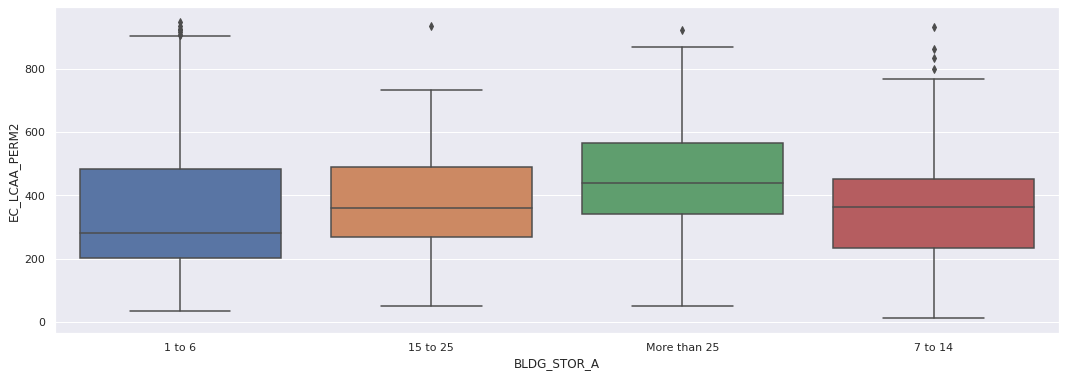

In [97]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.boxplot(x='BLDG_STOR_A', y='EC_LCAA_PERM2', data=df, orient="v")

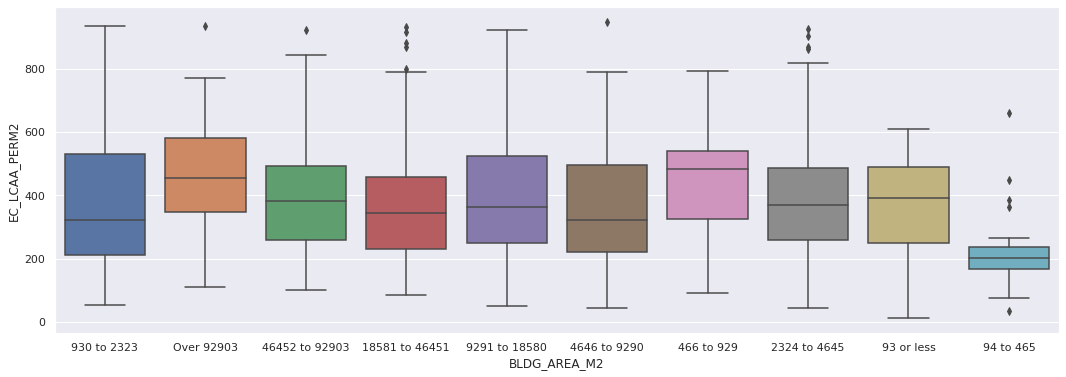

In [98]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.boxplot(x='BLDG_AREA_M2', y='EC_LCAA_PERM2', data=df, orient="v")

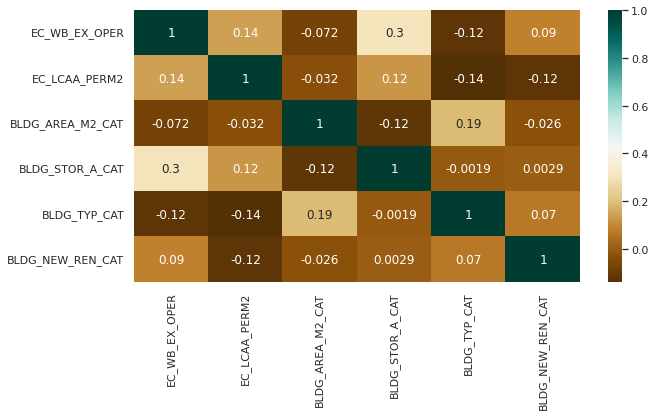

In [99]:
df['BLDG_AREA_M2_CAT']=df['BLDG_AREA_M2'].astype('category').cat.codes
df['BLDG_STOR_A_CAT']=df['BLDG_STOR_A'].astype('category').cat.codes
df['BLDG_TYP_CAT']=df['BLDG_TYP'].astype('category').cat.codes
df['BLDG_NEW_REN_CAT']=df['BLDG_NEW_REN'].astype('category').cat.codes

df.corr()
plt.figure(figsize=(10,5))
c= df.corr(method='pearson')
sns.heatmap(c,cmap="BrBG",annot=True)

We can say that there is no significant relation between different variables. However the most effective items on LCAA per m2 is;

1.   Building Store Number
2.   Building Type
3.   Building New Or Renovation





In [100]:
df=df.drop(['EC_WB_EX_OPER','BLDG_AREA_M2_CAT'],axis=1)
df.head(5)

,BLDG_TYP,BLDG_US,BLDG_LOC_REGION,BLDG_NEW_REN,BLDG_AREA_M2,BLDG_STOR_A,EC_LCAA_PERM2,BLDG_STOR_A_CAT,BLDG_TYP_CAT,BLDG_NEW_REN_CAT
3,Commercial,Other,North America,New,930 to 2323,1 to 6,938.69,0,0,0
4,Commercial,Office,Asia-Pacific,New,Over 92903,15 to 25,937.59,1,0,0
5,Commercial,Office,Asia-Pacific,New,46452 to 92903,1 to 6,923.30,0,0,0
6,Commercial,Other,North America,New,18581 to 46451,1 to 6,917.93,0,0,0
7,Commercial,Other,North America,New,18581 to 46451,1 to 6,882.65,0,0,0


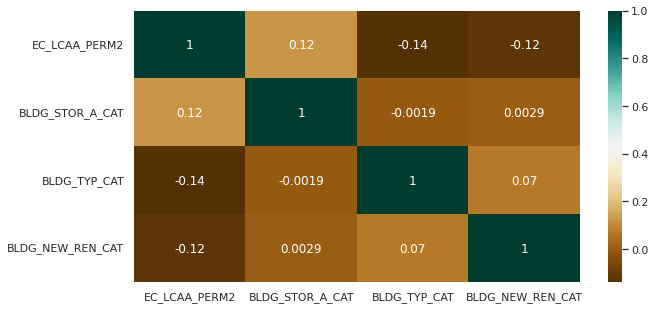

In [101]:
df.corr()
plt.figure(figsize=(10,5))
c= df.corr(method='pearson')
sns.heatmap(c,cmap="BrBG",annot=True)

# ML Models

sklearn.ensemble.RandomForestRegressor

Test Data Split

In [123]:
features = df.drop(["EC_LCAA_PERM2",'BLDG_TYP','BLDG_US','BLDG_LOC_REGION','BLDG_NEW_REN','BLDG_AREA_M2','BLDG_STOR_A'], axis=1).columns
features

Index(['BLDG_STOR_A_CAT', 'BLDG_TYP_CAT', 'BLDG_NEW_REN_CAT'], dtype='object')

In [119]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [139]:
clf = RandomForestRegressor(n_estimators=50)
clf.fit(df_train[features], df_train["EC_LCAA_PERM2"])

RandomForestRegressor(n_estimators=50)

In [140]:
predictions = clf.predict(df_test[features])

display(predictions)

array([425.01994335, 326.47140782, 394.15774462, 338.47784829,
       338.47784829, 507.67595883, 338.47784829, 338.47784829,
       405.54436005, 338.47784829, 214.55295014, 338.47784829,
       338.47784829, 507.67595883, 425.01994335, 507.67595883,
       338.47784829, 338.47784829, 214.55295014, 507.67595883,
       338.47784829, 338.47784829, 394.15774462, 394.15774462,
       225.32136929, 425.01994335, 394.15774462, 425.01994335,
       394.15774462, 394.15774462, 338.47784829, 411.85281544,
       425.01994335, 394.15774462, 394.15774462, 338.47784829,
       394.15774462, 394.15774462, 507.67595883, 374.21399266,
       405.54436005, 326.47140782, 338.47784829, 214.55295014,
       338.47784829, 394.15774462, 394.15774462, 394.15774462,
       394.15774462, 405.54436005, 405.54436005, 411.85281544,
       394.15774462, 338.47784829, 411.85281544, 394.15774462,
       225.32136929, 394.15774462, 425.01994335, 338.47784829,
       394.15774462, 394.15774462, 425.01994335, 394.15

In [141]:
score = clf.score(df_test[features], df_test["EC_LCAA_PERM2"])
print("Accuracy: ", score)

Accuracy:  0.12417728855279608


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


,importance,labels
0,0.456846,BLDG_STOR_A_CAT
1,0.367356,BLDG_TYP_CAT
2,0.175798,BLDG_NEW_REN_CAT


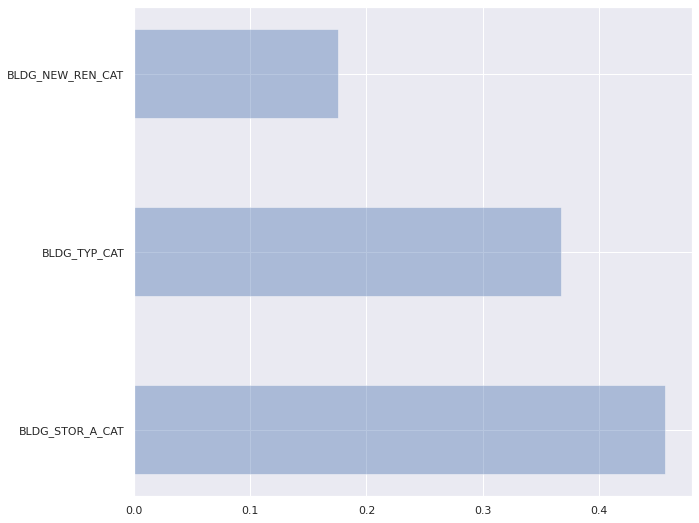

In [143]:
ig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()